# Import Librabries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk import ngrams
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

import warnings
warnings.filterwarnings('ignore')

# Loading Dataset

In [4]:
df = pd.read_csv('/content/drive/MyDrive/ML L&T EduTech/Task-4/Restaurant_Reviews.csv')
df.head(10)

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
5,Now I am getting angry and I want my damn pho.,0
6,Honeslty it didn't taste THAT fresh.),0
7,The potatoes were like rubber and you could te...,0
8,The fries were great too.,1
9,A great touch.,1


In [5]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0    Review  1000 non-null   object
 1   Liked    1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


 Review    0
Liked      0
dtype: int64

In [6]:
liked_counts = df['Liked'].value_counts()
print(liked_counts)

Liked
1    500
0    500
Name: count, dtype: int64


# Processing Text

In [8]:
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer

# Print English stopwords
print(stopwords.words('english'))

# Initialize the Porter Stemmer
ps = PorterStemmer()

# Initialize the CountVectorizer
cv = CountVectorizer()


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [9]:
def text_processing(text):
  text = re.sub(r'[^a-zA-Z]', ' ', text)
  text = text.lower()
  text = ' '.join([ps.stem(word) for word in text.split() if word not in stopwords.words('english')])
  return text

In [10]:
def remove_mult_spaces(text): # remove multiple spaces
    return re.sub("\s\s+" , " ", text)

In [11]:
df['cleaned_reviews'] = (df[' Review'].apply(text_processing).apply(remove_mult_spaces))
df.head()

,Review,Liked,cleaned_reviews
0,Wow... Loved this place.,1,wow love place
1,Crust is not good.,0,crust good
2,Not tasty and the texture was just nasty.,0,tasti textur nasti
3,Stopped by during the late May bank holiday of...,1,stop late may bank holiday rick steve recommen...
4,The selection on the menu was great and so wer...,1,select menu great price


In [53]:
def entropy(labels):
    """Compute entropy given the array of labels."""
    unique_labels, counts = np.unique(labels, return_counts=True)
    probs = counts / len(labels)
    return -np.sum(probs * np.log2(probs + 1e-6))

def gini(labels):
    """Compute Gini impurity given the array of labels."""
    unique_labels, counts = np.unique(labels, return_counts=True)
    probs = counts / len(labels)
    return 1 - np.sum(probs ** 2)

In [12]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_reviews'], df['Liked'], test_size=0.2, random_state=42)

In [13]:
# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


In [14]:
# Train Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)
nb_pred = nb_classifier.predict(X_test_tfidf)

In [15]:
# Train SVM classifier
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_tfidf, y_train)
svm_pred = svm_classifier.predict(X_test_tfidf)

In [54]:
# Evaluate the models
print("Naive Bayes:")
print("Accuracy:", accuracy_score(y_test, nb_pred))
print("Entropy:", entropy(y_test))
print("Gini Impurity:", gini(y_test))
print("Classification Report:\n", classification_report(y_test, nb_pred))

print("\nSVM:")
print("Accuracy:", accuracy_score(y_test, svm_pred))
print("Entropy:", entropy(y_test))
print("Gini Impurity:", gini(y_test))
print("Classification Report:\n", classification_report(y_test, svm_pred))

Naive Bayes:
Accuracy: 0.745
Entropy: 0.9988426506080101
Gini Impurity: 0.4992
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.76      0.74        96
           1       0.77      0.73      0.75       104

    accuracy                           0.74       200
   macro avg       0.75      0.75      0.74       200
weighted avg       0.75      0.74      0.75       200


SVM:
Accuracy: 0.75
Entropy: 0.9988426506080101
Gini Impurity: 0.4992
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.81      0.76        96
           1       0.80      0.69      0.74       104

    accuracy                           0.75       200
   macro avg       0.75      0.75      0.75       200
weighted avg       0.76      0.75      0.75       200



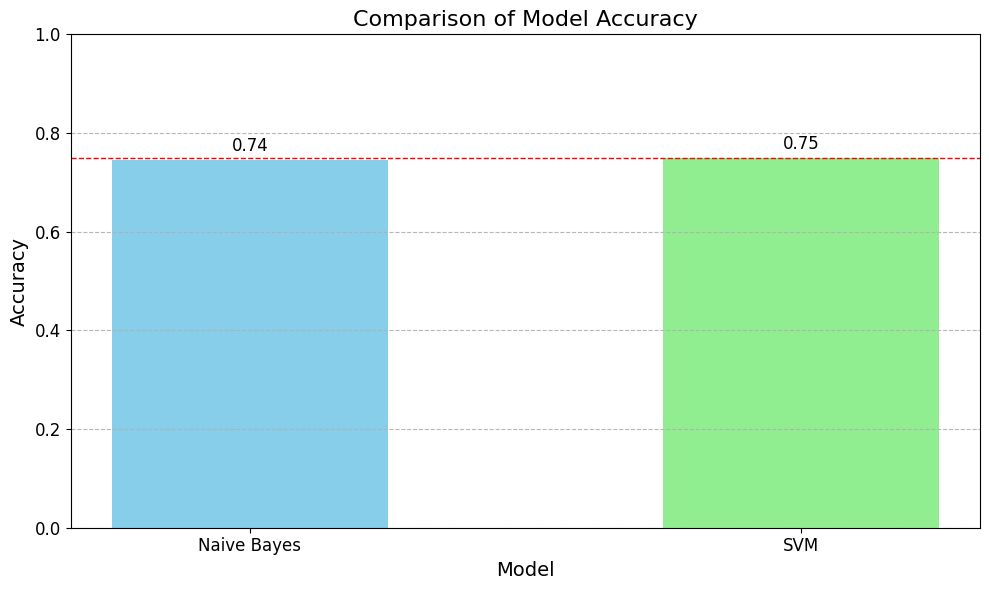

In [52]:
import matplotlib.pyplot as plt

# Calculate accuracy scores
nb_accuracy = accuracy_score(y_test, nb_pred)
svm_accuracy = accuracy_score(y_test, svm_pred)

# Create a bar chart
plt.figure(figsize=(10, 6))
models = ['Naive Bayes', 'SVM']
accuracy_values = [nb_accuracy, svm_accuracy]
bars = plt.bar(models, accuracy_values, color=['skyblue', 'lightgreen'], width=0.5)

# Add annotations with larger font size
for bar, accuracy in zip(bars, accuracy_values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f'{accuracy:.2f}', ha='center', va='bottom', fontsize=12)

# Add horizontal line at maximum accuracy
max_accuracy = max(accuracy_values)
plt.axhline(y=max_accuracy, color='red', linestyle='--', linewidth=1)

plt.xlabel('Model', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Comparison of Model Accuracy', fontsize=16)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.9)
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()
